In [5]:
import matplotlib.pyplot as py
import numpy as np
import math

$M_{pl} = 1$, potentials $V = V_0\phi^k$, $H_0 = 2.5\times10^{-5}$ simulating $H$ trajectories using HJ formalism, so $\frac{dH}{d\phi} = \sqrt{1.5H^2 - 0.5V}$

In [26]:
def trajectory(V_0, k, phi_0, dphi = 0.00001, boundmultiplier = 100, epsilon_skip = False, H0 = 2.5e-5):
    T =  int(phi_0/dphi)
    phi = [phi_0 - dummy for dummy in np.linspace(0, phi_0, boundmultiplier*T+1)]   #mesh for phi
    H = np.zeros(boundmultiplier*T+1)
    H[0]  = H0
    epsilon = 0
    n = 0
    #SPACE
    while ((epsilon < 1) or (epsilon_skip)) and (n < boundmultiplier*T):
        K1 = (1.5*(H[n]**2) - 0.5*V_0*(phi[n])**k)**0.5
        K2 = (1.5*((H[n] - 0.5*dphi*K1)**2) - 0.5*V_0*(phi[n] - 0.5*dphi)**k)**0.5
        K3 = (1.5*((H[n] - 0.5*dphi*K2)**2) - 0.5*V_0*(phi[n] - 0.5*dphi)**k)**0.5
        K4 = (1.5*((H[n] - dphi*K3)**2) - 0.5*V_0*(phi[n] - dphi)**k)**0.5
        grad = (K1 + 2*K2 + 2*K3 + K4)/6
        H[n+1] = H[n] - dphi*grad
        if np.isnan(((H[n+1]**2) - 0.5*V_0*(phi[n+1])**k)/(H[n+1]**2)):
            break
        epsilon = 2*(1.5*(H[n+1]**2) - 0.5*V_0*(phi[n+1])**k)/(H[n+1]**2)
        n += 1
    return phi[0:n+1], H[0:n+1], n, epsilon

In [22]:
242**0.5

15.556349186104045

In [23]:
(2.5e-5)**2/(242*3) #Slow roll V_0

8.608815426997245e-13

C:\Users\Jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


n = 34860
ε = -6.617574069516072e-09


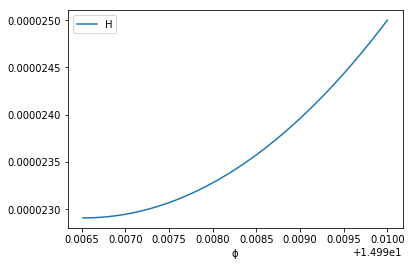

In [27]:
phi, H, n, epsilon = trajectory(7e-12, 2, 15)
py.plot(phi, H, label='H')
py.xlabel('ϕ')
py.legend()
print("n =", n, end = '\n')
print("ε =", epsilon)

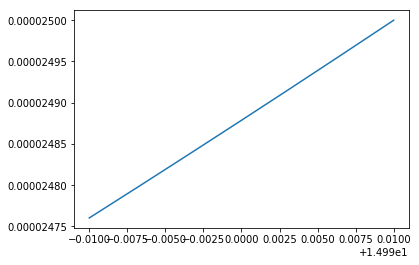

In [23]:
V0 = 7e-12
H0 = 2.5e-5
C = math.atanh((1-(V0*(15)**2)/(3*(H0)**2))**0.5) - ((3/2)**0.5)*(15 - 2*np.log(15))

phi = np.linspace(14.98, 15, 1001)
H = [((1/3)*((V0*(ϕ)**2)/(1 - (math.tanh(((3/2)**0.5)*(ϕ - 2*np.log(ϕ)) + C)**2))))**0.5 for ϕ in phi]

py.plot(phi, H)

In [10]:
type(epsilon)

numpy.float64

In [4]:
from tabulate import tabulate

In [5]:
data = []
for num in range(10, 16):
    nlast = False
    for x in [7.0 + n for n in np.linspace(0, 3.0,301)]:
        _1, _2, n, _3 = trajectory(x*1.0e-11, 1, phi_0 = num)
        if n == 1:
            if nlast == True:
                data.append([num, x])
                break
            else:
                continue
        nlast = True
        
print(tabulate(data))

C:\Users\Jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [ ]:
for num in range(16, 20):
    nlast = False
    for x in [7.0 + n for n in np.linspace(0, 3.0,301)]:
        _1, _2, n, _3 = trajectory(x*1.0e-11, 1, phi_0 = num)
        if n == 1:
            if nlast == True:
                data.append([num, x])
                break
            else:
                continue
        nlast = True
        
print(tabulate(data))

In [6]:
import json
with open('v0_and_phi_table.txt', 'w') as f:
    f.write(json.dumps(data))

#Now read the file back into a Python list object
with open('v0_and_phi_table.txt', 'r') as f:
    table = json.loads(f.read())
    
print(tabulate(table, headers = ["ϕ_60","A good value of V_0 x 10^10"]))

ϕ_60    A good value of V_0 x 10^10
------  -----------------------------


In [ ]:
for x in table:
    py.plot(x[0], x[1], 'r*')

In [28]:
data

[]

We had been choosing random initial $\phi_0$. Now we will check corresponding $N$ values integrate backwards while $N < N_{\mathrm{start}} \approx 60$

$N = \frac{1}{2}\int^{\phi_N}_{\phi_0}\sqrt{\frac{2}{\varepsilon}} d\phi$

In [26]:


def init_phi(Nstart, V_0, k, phi_0 = 10, dphi = 0.0001, boundmultiplier = 100, epsilon_skip = False, H0 = 2.5e-5):
    T = int(phi_0/dphi)
    phi, J, _, epsilon = trajectory(V_0, k, phi_0, dphi, boundmultiplier, epsilon_skip, H0)
    N = 0
    phi = phi[-1]
    H = J[-1]
    ε = np.zeros(boundmultiplier*T + 1)
    ε[0] = epsilon
    n = 0
    while (N < Nstart) and (n < boundmultiplier*T):
        K1 = (1.5*(H**2) - 0.5*V_0*(phi)**k)**0.5
        K2 = (1.5*((H + 0.5*dphi*K1)**2) - 0.5*V_0*(phi + 0.5*dphi)**k)**0.5
        K3 = (1.5*((H + 0.5*dphi*K2)**2) - 0.5*V_0*(phi + 0.5*dphi)**k)**0.5
        K4 = (1.5*((H + dphi*K3)**2) - 0.5*V_0*(phi + dphi)**k)**0.5
        grad = (K1 + 2*K2 + 2*K3 + K4)/6
        H += dphi*grad
        if not isinstance((1.5*(H**2) - 0.5*V_0*(phi+dphi)**k)/(H**2), float):
            break
        ε[n+1] = 0.5*(1.5*(H**2) + 0.5*V_0*(phi+dphi)**k)/(H**2)
        #SPACE
        J1 = (2 / ε[n])**0.5
        J2 = (2 / ε[n+1])**0.5
        N += dphi*(J1 + J2)/4
        n += 1
        phi += dphi
    return phi, N, H

In [21]:
init_phi(60, 8e-13, 2, phi_0 = 15)

(33.391799000006586, 60.000294392137285, 147585.21804776587)

We have been choosing $H_0 =  2.5\times10^{-5}$. If we want to continue this, we need to scale the Hamilton Jacobi equation so that $V_0 \rightarrow \frac{V_0}{H_0^2}$ or change $H_0$ 

In [27]:
def tot_traj(Nstart, V_0, k, phi_0 = 10, dphi = 0.0001, boundmultiplier = 100, epsilon_skip = False, H0 = 2.5e-5):
    initphi, _, H0 = init_phi(Nstart, V_0, k, phi_0, dphi, boundmultiplier, epsilon_skip, H0)
    phi, H, n, epsilon = trajectory(V_0/(H0**2), k, initphi, dphi, boundmultiplier, epsilon_skip, H0)
    return phi, (H0**2)*H, n, epsilon, V_0/(H0**2)

n = 1
ε = 3.0


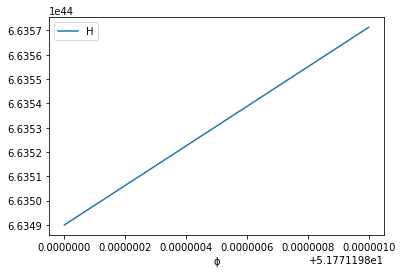

In [28]:
phi, H, n, epsilon, _ = tot_traj(60, 8e-13, 2, phi_0 = 33.4, H0 = 147585)
py.plot(phi, H, label='H')
py.xlabel('ϕ')
py.legend()
print("n =", n, end = '\n')
print("ε =", epsilon)

I now try to narrow down some sensible $\phi_0$ values

In [ ]:
S = []
for x in [2.3 + n for n in np.linspace(-0.1, 0.1, 101)]:
    _1, _2, n, _3 = tot_traj(60, 1, 1, phi_0 = x)
    S.append(n)
m = max(S)
for i, x in enumerate(S):
    if x == m:
        print(i)
        break